Iniciando Gradiente Descendente em P0 = (80.00, 80.00), f(P0) = 7475.0100
----------------------------------------------------------------------
Iteração   | Ponto (x, y)              | f(P)            | Norma do Gradiente
----------------------------------------------------------------------
1          | (73.4000, 64.0200)          | 4784.7264       | 172.8931       
2          | (68.1200, 51.2360)          | 3062.9449       | 138.3145       
3          | (63.8960, 41.0088)          | 1961.0047       | 110.6516       
4          | (60.5168, 32.8270)          | 1255.7630       | 88.5213        
5          | (57.8134, 26.2816)          | 804.4083        | 70.8170        
10         | (50.5433, 8.6792)          | 88.1579         | 23.2053        
20         | (47.3805, 1.0212)          | 2.9933          | 2.4917         
30         | (47.0409, 0.1989)          | 2.0115          | 0.2675         
40         | (47.0044, 0.1106)          | 2.0001          | 0.0287         
50         | (47.

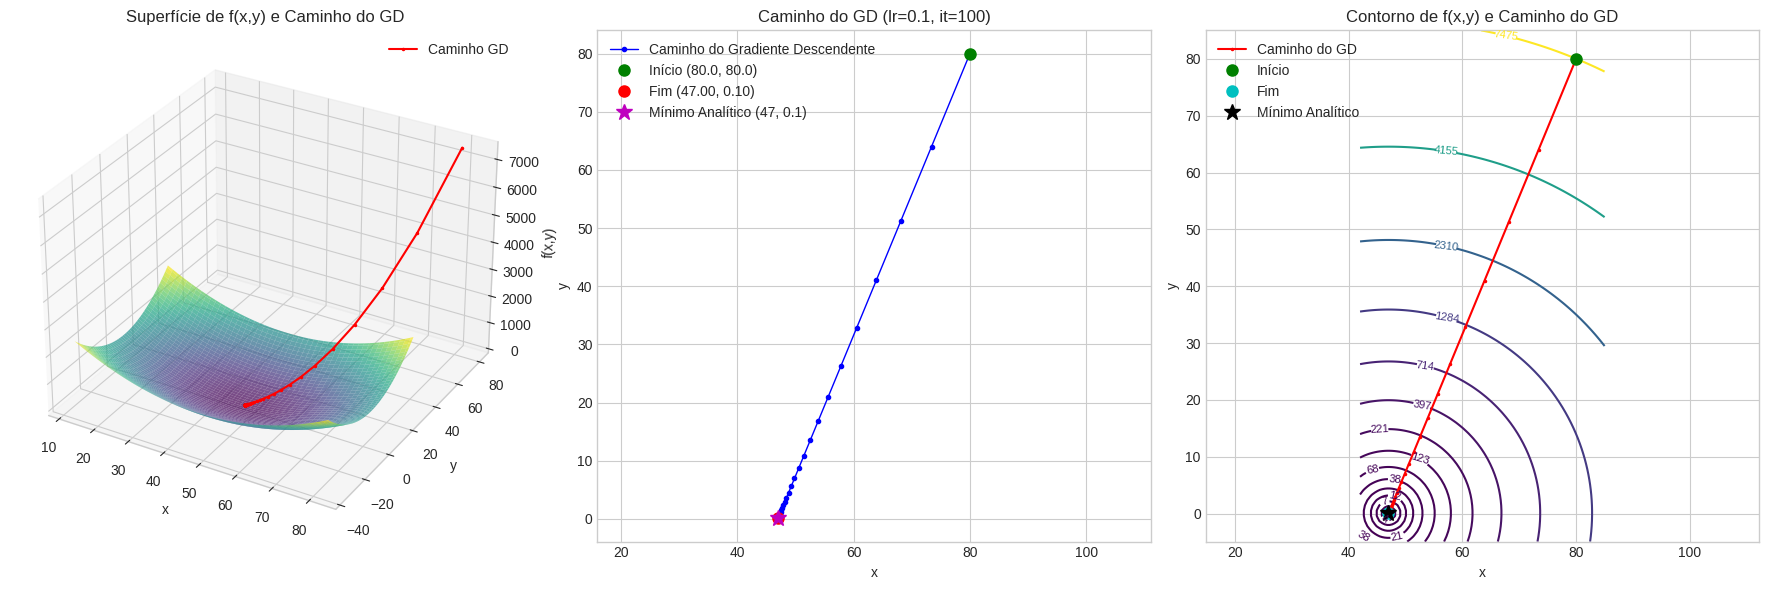

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Para o plot 3D

# 0. Mudar o estilo de plotagem
plt.style.use('seaborn-v0_8-whitegrid')

# 1. Definir a função f(X) e seu gradiente gradF(X)

def f(X):
    """
    Calcula o valor da função f(x,y) = (x - 47)^2 + (y - 0.1)^2 + 2.
    X é esperado como um array numpy ou lista [x, y].
    """
    x = X[0]
    y = X[1]
    return (x - 47)**2 + (y - 0.1)**2 + 2

def gradF(X):
    """
    Calcula o gradiente da função f(x,y).
    ∇f = [∂f/∂x, ∂f/∂y]
    ∂f/∂x = 2*(x - 47)
    ∂f/∂y = 2*(y - 0.1)
    X é esperado como um array numpy ou lista [x, y].
    """
    x = X[0]
    y = X[1]
    df_dx = 2 * (x - 47)
    df_dy = 2 * (y - 0.1)
    return np.array([df_dx, df_dy])

# 2. Implementar o Algoritmo de Gradiente Descendente

# Ponto inicial
P_start = np.array([80.0, 80.0])

# Hiperparâmetros do algoritmo
learning_rate = 0.1  # Taxa de aprendizado (alpha ou eta)
num_iterations = 100 # Número de iterações

# Listas para armazenar o histórico da otimização
points_history = [P_start.copy()] # Armazena os pontos (x,y)
f_values_history = [f(P_start)]   # Armazena os valores de f(x,y)

current_P = P_start.copy()

print(f"Iniciando Gradiente Descendente em P0 = ({P_start[0]:.2f}, {P_start[1]:.2f}), f(P0) = {f(P_start):.4f}")
print("-" * 70)
print(f"{'Iteração':<10} | {'Ponto (x, y)':<25} | {'f(P)':<15} | {'Norma do Gradiente':<15}")
print("-" * 70)

for i in range(num_iterations):
    gradient = gradF(current_P)
    norm_gradient = np.linalg.norm(gradient)

    # Atualiza o ponto
    current_P = current_P - learning_rate * gradient

    # Armazena o histórico
    points_history.append(current_P.copy())
    f_values_history.append(f(current_P))

    # Imprime o progresso em intervalos
    if i < 5 or (i + 1) % 10 == 0 or i == num_iterations - 1:
        print(f"{i+1:<10} | ({current_P[0]:.4f}, {current_P[1]:.4f}){'':<9} | {f(current_P):<15.4f} | {norm_gradient:<15.4f}")

points_history_np = np.array(points_history)

print("-" * 70)
print(f"\nOtimização concluída após {num_iterations} iterações.")
print(f"Ponto inicial: ({P_start[0]:.2f}, {P_start[1]:.2f}), f(P_inicial) = {f(P_start):.4f}")
print(f"Ponto encontrado: ({current_P[0]:.4f}, {current_P[1]:.4f}), f(P_final) = {f(current_P):.4f}")
print(f"Mínimo analítico: (47.00, 0.10), f(P_min) = 2.0000")


# 3. Criar DataFrame com os pontos (opcional, mas pedido no notebook original)
df_path = pd.DataFrame(points_history_np, columns=['x', 'y'])
df_path['f_value'] = f_values_history

print("\nÚltimos 5 passos do Gradiente Descendente:")
print(df_path.tail())


# 4. Plotar os resultados

# 4.1 Plot da superfície 3D da função f(x,y)
fig = plt.figure(figsize=(18, 6)) # Figura maior para acomodar subplots
ax1 = fig.add_subplot(131, projection='3d')

x_surf = np.linspace(current_P[0] - 35, current_P[0] + 35, 100) # Ajustar range se necessário
y_surf = np.linspace(current_P[1] - 35, current_P[1] + 35, 100)
X_surf, Y_surf = np.meshgrid(x_surf, y_surf)
Z_surf = f([X_surf, Y_surf])

ax1.plot_surface(X_surf, Y_surf, Z_surf, cmap='viridis', alpha=0.7, edgecolor='none')
ax1.plot(points_history_np[:, 0], points_history_np[:, 1], f_values_history, 'r.-', markersize=3, linewidth=1.5, label='Caminho GD')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')
ax1.set_title('Superfície de f(x,y) e Caminho do GD')
ax1.legend()

# 4.2 Plot do caminho do Gradiente Descendente (2D)
ax2 = fig.add_subplot(132)
ax2.plot(df_path['x'], df_path['y'], 'bo-', label='Caminho do Gradiente Descendente', markersize=3, linewidth=1)
ax2.plot(P_start[0], P_start[1], 'go', markersize=8, label=f'Início ({P_start[0]:.1f}, {P_start[1]:.1f})')
ax2.plot(current_P[0], current_P[1], 'ro', markersize=8, label=f'Fim ({current_P[0]:.2f}, {current_P[1]:.2f})')
ax2.plot(47, 0.1, 'm*', markersize=12, label='Mínimo Analítico (47, 0.1)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title(f'Caminho do GD (lr={learning_rate}, it={num_iterations})')
ax2.legend()
ax2.grid(True)
ax2.axis('equal')

# 4.3 Plot do caminho em um diagrama de contorno
ax3 = fig.add_subplot(133)

# Definir limites para o gráfico de contorno com base no caminho
x_min_plot = min(df_path['x'].min(), 47, P_start[0]) - 5
x_max_plot = max(df_path['x'].max(), 47, P_start[0]) + 5
y_min_plot = min(df_path['y'].min(), 0.1, P_start[1]) - 5
y_max_plot = max(df_path['y'].max(), 0.1, P_start[1]) + 5

# Ajustar para que o range não seja muito pequeno se a convergência for rápida
if x_max_plot - x_min_plot < 20:
    center_x = (x_min_plot + x_max_plot) / 2
    x_min_plot, x_max_plot = center_x - 10, center_x + 10
if y_max_plot - y_min_plot < 20:
    center_y = (y_min_plot + y_max_plot) / 2
    y_min_plot, y_max_plot = center_y - 10, center_y + 10

contour_x_vals = np.linspace(x_min_plot, x_max_plot, 100)
contour_y_vals = np.linspace(y_min_plot, y_max_plot, 100)
Contour_X_grid, Contour_Y_grid = np.meshgrid(contour_x_vals, contour_y_vals)
Contour_Z_grid = f([Contour_X_grid, Contour_Y_grid])

# Níveis de contorno
min_f_val_path = min(f_values_history)
max_f_val_path = max(f_values_history)
# Garantir que o mínimo global esteja incluído se for menor que o mínimo do caminho
levels = np.logspace(np.log10(max(2.01, min_f_val_path)), np.log10(max_f_val_path), 15)


contour_plot = ax3.contour(Contour_X_grid, Contour_Y_grid, Contour_Z_grid, levels=levels, cmap='viridis')
ax3.clabel(contour_plot, inline=True, fontsize=8, fmt='%1.0f')

ax3.plot(df_path['x'], df_path['y'], 'r.-', label='Caminho do GD', markersize=3, linewidth=1.5)
ax3.plot(P_start[0], P_start[1], 'go', markersize=8, label=f'Início')
ax3.plot(current_P[0], current_P[1], 'co', markersize=8, label=f'Fim') # Cor diferente para Fim
ax3.plot(47, 0.1, 'k*', markersize=12, label='Mínimo Analítico')

ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title('Contorno de f(x,y) e Caminho do GD')
ax3.legend(loc='upper left')
ax3.axis('equal')

plt.tight_layout() # Ajusta o espaçamento entre subplots
plt.show()